## Problem 1

Consider $u'(t)=f(u(t)),u(0)=u_0$, and $f:\mathbb{R}^{d}\to \mathbb{R}$ 
is Lipschitz continuous with a
Lipschitz constant $L$. Let $\max \Vert u''(t)\Vert$ be bounded by a constant $M$ for $0\le t\le T$. Prove that the backward Euler method converges as the step size $h\to 0$.


**Sketch of proof:** 

The backward Euler method is

$$
u_{n+1} = u_{n} + h f(u_{n+1}).
$$

Let $u(t_n)$ be the true solution at $t=t_n$.

$$ u_{n+1} = u_{n} + h f(u_{n+1}).$$

$$ u(t_{n+1}) = u(t_{n}) + h f(u(t_{n+1})) +\tau_n.$$

$\tau_n$ is LTE. Expand $u(t_{n+1})$ and $f(u(t_{n+1}))$ and find

$$\tau_n = \int_{t_n}^{t_{n+1}} u''(s) (t_{n+1}-s-h) ds.$$

Hence

$$\Vert\tau_n\Vert \le \frac12 M h^2.$$

(We can also get the same estimate for $\Vert\tau_n\Vert$ by the Lagrange form of the remainder)


Define the error $e_n= u(t_{n})-u_{n}$. Use the Lipschitz continuity, we have

$$\Vert e_{n+1} \Vert \le \Vert e_{n} \Vert + hL \Vert e_{n+1} \Vert + \Vert \tau_n\Vert.$$

When $hL<1$, the equation above can be written as

$$\Vert e_{n+1} \Vert \le \frac{1}{1-hL} (\Vert e_{n} \Vert + \frac12 M h^2).$$

Hence

$$\Vert e_N\Vert \le \left(\frac{1}{1-hL}\right)^N \Vert e_0 \Vert + \left[\left(\frac{1}{1-hL}\right)^N-1\right] \frac{1}{hL} \frac12 M h^2.$$

Use 

$$\left(\frac{1}{1-hL}\right)^N = \left(1+\frac{hL}{1-hL}\right)^N \le e^{\frac{NhL}{1-hL}} = e^{\frac{LT}{1-hL}}.$$ 

(We can also use another estimate here:    $1-x \leq e^{-x} \implies (1-hL)^{-n} \leq e^{-hL(-n)} =e^{nhL} = e^{TL}. $)

we have

$$\Vert e_N\Vert \le e^{\frac{LT}{1-hL}} \Vert e_0 \Vert + \left[e^{\frac{LT}{1-hL}}-1\right]  \frac{M h}{2L} .$$

This proves the convergence of the backward Euler method.

## Problem 2

Consider the initial value problem
$$
\begin{split}
u'_{1} &= u_{1},\\
u'_{2} &= u_{1} - u_{2},\\
\end{split}
$$
with initial condition $(u_{1}(0),u_{2}(0))=(1,1)$. 

1. Find a way to solve the problem above analytically, and write down the answer of u(T=2.0).

2. Solve the problem numerically using the trapezoidal rule. Verify that the solution agrees with the exact solution at time $T=2.0$. Use a number of step sizes $h=2^{-i},i=5,\ldots,10.$ Plot the error $e=\Vert u(1)-u^*(1)\Vert_2$ v.s. step size $h$ in a loglog plot, and estimate the convergence rate for each scheme.

**Note**: the routine for computing the error, plotting and computing the slope is provided. 

**Solution:**

You can convert it to a second order ODE and solve it. This gives the solution at $T=2.0$ is $(u_{1}(T),u_{2}(T))=(exp(2),0.5*(exp(2)+exp(-2)))$.


Let us do something fun and try to solve it with matrix exponential.

Define $$A = \begin{pmatrix} 1 & 0\\1 & -1\end{pmatrix}.$$

The solution at $T$ is

$$\begin{pmatrix} u_1\\ u_2 \end{pmatrix} = e^{AT}  \begin{pmatrix} u_1(0)\\ u_2(0)\end{pmatrix}.$$


Let us verify by Julia code.

In [1]:
using LinearAlgebra

# Compute solution by matrix exponential
A = [1 0; 1 -1]
T = 2.0
u = exp(A*T) * [1.0;1.0]   # expm computes the matrix exponential
uexact = [exp(T), 0.5*(exp(T)+exp(-T))]

println("u(T), exponential =", u)
println("u(T), sol         =", uexact)

u(T), exponential =[7.38905609893065, 3.762195691083632]
u(T), sol         =[7.38905609893065, 3.7621956910836314]


Now for the second part of the problem

Slope for Trapezoid = 2

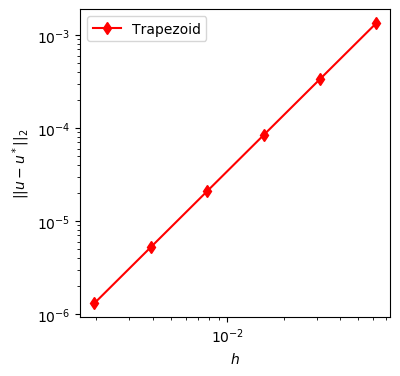

.000066050958678


In [2]:
function Trapezoid(N,T,u0)
    I2 = Matrix(1.0I,2,2)
    u = copy(u0)
    un = copy(u0)
    dt = 1/N
    MAX = round(T/dt)
    A = [1.0 0.0; 1.0 -1.0];
    P = inv(I2 - 0.5 * dt * A) * (I2 + 0.5 * dt * A)
    for i = 1 : MAX
        un = P * u
        u = un
    end
    return u
end

u0 = [1.0,1.0]
T = 2.0
# You need to compute uexact at T=2.0
uexact = [exp(T), 0.5*(exp(T)+exp(-T))]

# Plotting routine provided below

NList = 2 .^(5:10)
errTrapeList = zeros(size(NList))
for i = 1 : length(NList)
    N = NList[i]
    utrape = Trapezoid(N,T,u0)
    errTrapeList[i] = norm(utrape-uexact)
end

using PyPlot
figure(1,figsize=(4,4))
loglog(T./NList, errTrapeList, "r-d", label="Trapezoid")
xlabel(L"h")
ylabel(L"||u-u^*||_2")
legend()

slopeTrape = -(log(errTrapeList[end])-log(errTrapeList[1])) / 
(log(NList[end]) - log(NList[1]))

println("Slope for Trapezoid = ", slopeTrape )

## Problem 3

Consider a simple pendulum of length $l$, forming an angle $\theta(t)$ with the
vertical axis. The equation of motion for the pendulum is given by

$$\theta''(t)+\frac{g}{l} \sin(\theta(t))=0,$$

where $g$ is the gravitational constant, with given initial conditions

$$\theta(0)=\theta_0,\quad \theta'(0)=\omega_0.$$

1. Rewrite the equation as a system of first order equations in $u(t)=(\theta(t),\omega(t))$. Fill the `func` function below. 

2. Write a forward Euler method. Use a sufficiently small time step, and plot the solution of $\theta(t)$ with $g=l=1$ and initial condition $(\theta(0),\omega(0))=(2.5,0.0)$ till $T=25$. Since no exact solution is available, measure the convergence rate by means of the solution at T=25 obtained from three time steps h, h/2, and h/4.

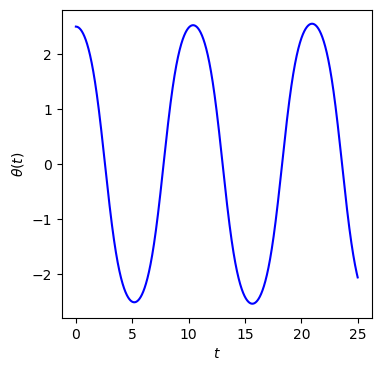

PyObject Text(26.0, 0.5, '$\\theta(t)$')

In [3]:
function func(u,g,l)
    # fill here for evaluating f(u)
    return [u[2],-g/l*sin(u[1])]
end

function ForwardEulerFull(N,T,u0,g,l)
    u = zeros(2,N+1)
    u[:,1] .= u0
    dt = T/N
    for i = 1 : N
        u[:,i+1] .= u[:,i] + dt * func(u[:,i],g,l)
    end
    return u
end

# This should plot out the solution
g=1.0
l=1.0
T=25.0
N=10000
u0=[2.5,0.0]

uEulerFull = ForwardEulerFull(N,T,u0,g,l)
tList = collect(0:N)*(T/N)

using PyPlot
figure(1,figsize=(4,4))
plot(tList,vec(uEulerFull[1,:]),"b-")
xlabel(L"t")
ylabel(L"\theta(t)")

In [5]:
function ForwardEuler(N,T,u0,g,l)
    u = copy(u0)
    dt = T/N
    for i = 1 : N
        u = u + dt * func(u,g,l)
    end
    return u
end


# Plotting routine provided below

g=1.0
l=1.0
T=25.0
u0=[2.5,0.0]
N = 100000
uEuler1N = ForwardEuler(N,T,u0,g,l)
uEuler2N = ForwardEuler(2*N,T,u0,g,l)
uEuler4N = ForwardEuler(4*N,T,u0,g,l)

#println(uEuler1N)
#println(uEuler2N)
#println(uEuler4N)

slopeEuler = log(norm(uEuler1N-uEuler2N)/norm(uEuler2N-uEuler4N))/log(2)
errEuler = norm(uEuler1N-uEuler2N)/(1-(0.5)^slopeEuler)
println("slope for Euler           = ", slopeEuler)
println("Estimated error for Euler = ", errEuler)

slope for Euler           = 1.0196139778528048
Estimated error for Euler = 0.03385381562110105


## Problem 4

1. Repeat Problem 3.2 using the trapezoidal rule. Modify your implementation in Problem 2 if needed.

2. Repeat Problem 3.2 using the Adams-Bashforth 3 (AB3) scheme. Obtain the first two steps using forward Euler and trapezoidal rule, respectively. Observe the difference in terms of the convergence rate.



In [6]:
# Need to solve the nonlinear equation in trapezoidal rule. Use fixed point iteration.
# Time step needs to be small enough for fixed point iteration to converge.
function Trapezoid(N,T,u0,g,l)
    u = copy(u0)
    dt = T/N
    maxIter = 1000
    tol = 1e-10
    for i = 1 : N
        # Use fixed point iteration to solve the nonlinear equation
        ut = u
        ut1 = u
        fu = func(u,g,l)
        for iter = 1 : maxIter
            fut = func(ut,g,l)
            ut1 = u + 0.5*dt*(fu+fut)

            if( norm(ut-ut1) < tol )
                break
            end
            ut = ut1
        end
        u = ut
    end
    return u
end

N = 1000
uTrape1N = Trapezoid(N,T,u0,g,l)
uTrape2N = Trapezoid(2*N,T,u0,g,l)
uTrape4N = Trapezoid(4*N,T,u0,g,l)

#println(uTrape1N)
#println(uTrape2N)
#println(uTrape4N)

slopeTrape = log(norm(uTrape1N-uTrape2N)/norm(uTrape2N-uTrape4N))/log(2)
errTrape = norm(uTrape1N-uTrape2N)/(1-(0.5)^slopeTrape)
println("slope for Trape           = ", slopeTrape)
println("Estimated error for Trape = ", errTrape)


slope for Trape           = 2.0111493102085234
Estimated error for Trape = 0.00025253441513798373


In [7]:
function AB3(N,T,u0,u1,u2,g,l)
    u = copy(u2)  # current step
    up1 = copy(u1) # previous step 1
    up2 = copy(u0) # previous step 2
    unew = copy(u0) # temp variable
    fu   = func(u,g,l)
    fup1 = func(up1,g,l)
    fup2 = func(up2,g,l)
    dt = T/N

    # Note the starting point
    for i = 3 : N
        unew = u + dt/12.0 * (23.0*fu - 16*fup1 + 5.0*fup2)
        up2 = copy(up1)
        up1 = copy(u)
        fup2 = copy(fup1)
        fup1 = copy(fu)
        u = copy(unew)
        fu = func(u,g,l)
    end
    return u
end


N = 10000
u1 = ForwardEuler(1,T/N,u0,g,l)
u2 = ForwardEuler(1,T/N,u1,g,l)
uAB3Euler1N = AB3(N,T,u0,u1,u2,g,l)

u1 = ForwardEuler(1,T/(2*N),u0,g,l)
u2 = ForwardEuler(1,T/(2*N),u1,g,l)
uAB3Euler2N = AB3(2*N,T,u0,u1,u2,g,l)

u1 = ForwardEuler(1,T/(4*N),u0,g,l)
u2 = ForwardEuler(1,T/(4*N),u1,g,l)
uAB3Euler4N = AB3(4*N,T,u0,u1,u2,g,l)

slopeAB3Euler = log(norm(uAB3Euler1N-uAB3Euler2N)/norm(uAB3Euler2N-uAB3Euler4N))/log(2)
errAB3Euler = norm(uAB3Euler1N-uAB3Euler2N)/(1-(0.5)^slopeAB3Euler)
println("slope for AB3Euler           = ", slopeAB3Euler)
println("Estimated error for AB3Euler = ", errAB3Euler)

slope for AB3Euler           = 1.9684150458385057
Estimated error for AB3Euler = 4.218921536770717e-5


In [8]:
N = 10000
u1 = Trapezoid(1,T/N,u0,g,l)
u2 = Trapezoid(1,T/N,u1,g,l)
uAB3Trape1N = AB3(N,T,u0,u1,u2,g,l)

u1 = Trapezoid(1,T/(2*N),u0,g,l)
u2 = Trapezoid(1,T/(2*N),u1,g,l)
uAB3Trape2N = AB3(2*N,T,u0,u1,u2,g,l)

u1 = Trapezoid(1,T/(4*N),u0,g,l)
u2 = Trapezoid(1,T/(4*N),u1,g,l)
uAB3Trape4N = AB3(4*N,T,u0,u1,u2,g,l)

slopeAB3Trape = log(norm(uAB3Trape1N-uAB3Trape2N)/norm(uAB3Trape2N-uAB3Trape4N))/log(2)
errAB3Trape = norm(uAB3Trape1N-uAB3Trape2N)/(1-(0.5)^slopeAB3Trape)
println("slope for AB3Trape           = ", slopeAB3Trape)
println("Estimated error for AB3Trape = ", errAB3Trape)

slope for AB3Trape           = 2.9992933897312364
Estimated error for AB3Trape = 1.5895117156197749e-6
